# Investigating Correlation between Blockchain ETF and Cryptocurrency Prices
We are investigating the Elwood Blockchain Global Equity Index. All prices are in USD unless otherwise indicated.
For comparative Cryptocurrencies, we choose the three biggest Cryptocurrencies by market capitalisation as of May 4th 2021: Bitcoin (BTC), Ethereum (ETH) and Binance (BNB).

## Motivation
The ETF named above invests in a wide variety of assets, many of which are not directly related to Cryptocurrencies such as Bitcoin. The performance of the ETF - however - has been really good in the past months, matching the exorbitant development of Cryptocurrency prices. The question arises how much the ETF performance gained from the Cryptocurrency boom. Without prodiving conditional evidence here, we would like to visually explore the correlation of the ETF and Cryptocurrency performaces. [Here is the latest quaterly index report with the makeup of the fund.](https://elwoodam.com/wp-content/uploads/2021/05/Index-Review-April-2021.pdf)

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Load Data

In [2]:
def data_loader(file_name):
    dates, prices = [], []
    data = {}
    with open("data/"+file_name, newline="") as file:
        reader = csv.reader(file, delimiter=',', quotechar='|')
        for row in reader:
            try:
                date = datetime.strptime(row[0], '%Y-%m-%d')
                price = float(row[4])
                dates.append(date)
                prices.append(price)
                data[date] = price
            except ValueError:
                pass
    return dates, prices, data

### Load Historic ETF Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices as traded on the Milan Stock Exchange.

In [3]:
# Store date against closing price
etf_dates, etf_prices, etf_data = data_loader("BCHN-MI.csv")
print(f"Number of ETF closing prices: {len(etf_dates)}. First price: {etf_dates[0].strftime('%Y-%m-%d')}.")

Number of ETF closing prices: 530. First price: 2019-03-21.


### Load Historic Bitcoin Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices from CCC - CoinMarketCap.

In [4]:
# Store date against closing price
btc_dates, btc_prices, btc_data = data_loader("BTC-USD.csv")        
print(f"Number of BTC closing prices: {len(btc_dates)}. First price: {btc_dates[0].strftime('%Y-%m-%d')}.")

Number of BTC closing prices: 2416. First price: 2014-09-17.


### Load Historic Ethereum Prices
The data was downloaded from Yahoo Finance on May 4th with daily prices from CCC - CoinMarketCap.

In [5]:
#Store date against closing price
eth_dates, eth_prices, eth_data = data_loader("ETH-USD.csv")        
print(f"Number of ETH closing prices: {len(eth_dates)}. First price: {eth_dates[0].strftime('%Y-%m-%d')}.")

Number of ETH closing prices: 2094. First price: 2015-08-07.


### Load Historic Binance Prices
The data was downloaded from Yahoo Finance on May 4th with daily prices from CCC - CoinMarketCap.

In [6]:
# Store date against closing price
bnb_dates, bnb_prices, bnb_data = data_loader("BNB-USD.csv")                
print(f"Number of BNB closing prices: {len(bnb_dates)}. First price: {bnb_dates[0].strftime('%Y-%d-%d')}.")

Number of BNB closing prices: 1376. First price: 2017-25-25.


## Analysis

### Plot Raw Prices
Over full duration of data collection.

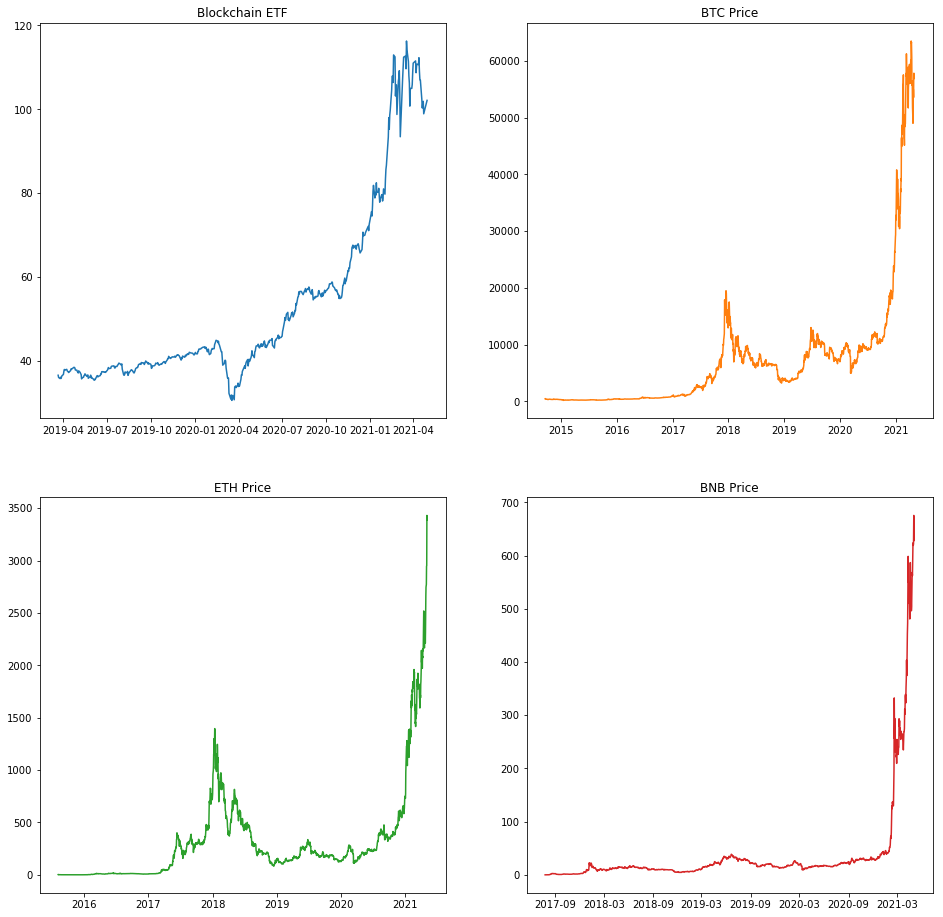

In [7]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16, 16)

axs[0, 0].set_title('Blockchain ETF')
axs[0, 0].plot(etf_dates, etf_prices)

axs[0, 1].set_title('BTC Price')
axs[0, 1].plot(btc_dates, btc_prices, 'tab:orange')

axs[1, 0].set_title('ETH Price')
axs[1, 0].plot(eth_dates, eth_prices, 'tab:green')

axs[1, 1].set_title('BNB Price')
axs[1, 1].plot(bnb_dates, bnb_prices, 'tab:red')

plt.show()

### Plot Price Overlay
Overlay the prices of assets from the day of the ETF creation or later. Normalize all to start at the same price on day 0.

In [8]:
# Add a delay to when to graph from, in ETF trading days
orig_start_days = 0

start_days = orig_start_days
start_day = etf_dates[1+start_days]

# Start price
base_index = 100

In [9]:
# Match time horizon of previous emission to later emission
def match_dates(start_day, dates):
    for i in range(len(dates)):
        if dates[i] == start_day:
            return i
        
# Normalize prices
def price_indexing(prices, index, start_date):
    price_indexed = [index]
    for i in range(start_date, len(prices)):
        index = index * prices[i] / prices[i-1]
        price_indexed.append(index)
    return price_indexed

In [10]:
# Index ETF Price at 100
etf_price_indexed = price_indexing(etf_prices, base_index, start_days+2)
    
# Index BTC Price at 100
btc_match = match_dates(start_day, btc_dates)
btc_price_indexed = price_indexing(btc_prices, base_index, btc_match)
    
# Index ETH Price at 100
eth_match = match_dates(start_day, eth_dates)
eth_price_indexed = price_indexing(eth_prices, base_index, eth_match)
    
# Index BNB Price at 100
bnb_match = match_dates(start_day, bnb_dates)
bnb_price_indexed = price_indexing(bnb_prices, base_index, bnb_match)

In [11]:
print("Data Points:")
print(f"\tETF: {len(etf_price_indexed)}, BTC: {len(btc_price_indexed)}, ETH: {len(eth_price_indexed)}, BNB: {len(bnb_price_indexed)}")

Data Points:
	ETF: 529, BTC: 770, ETH: 772, BNB: 772


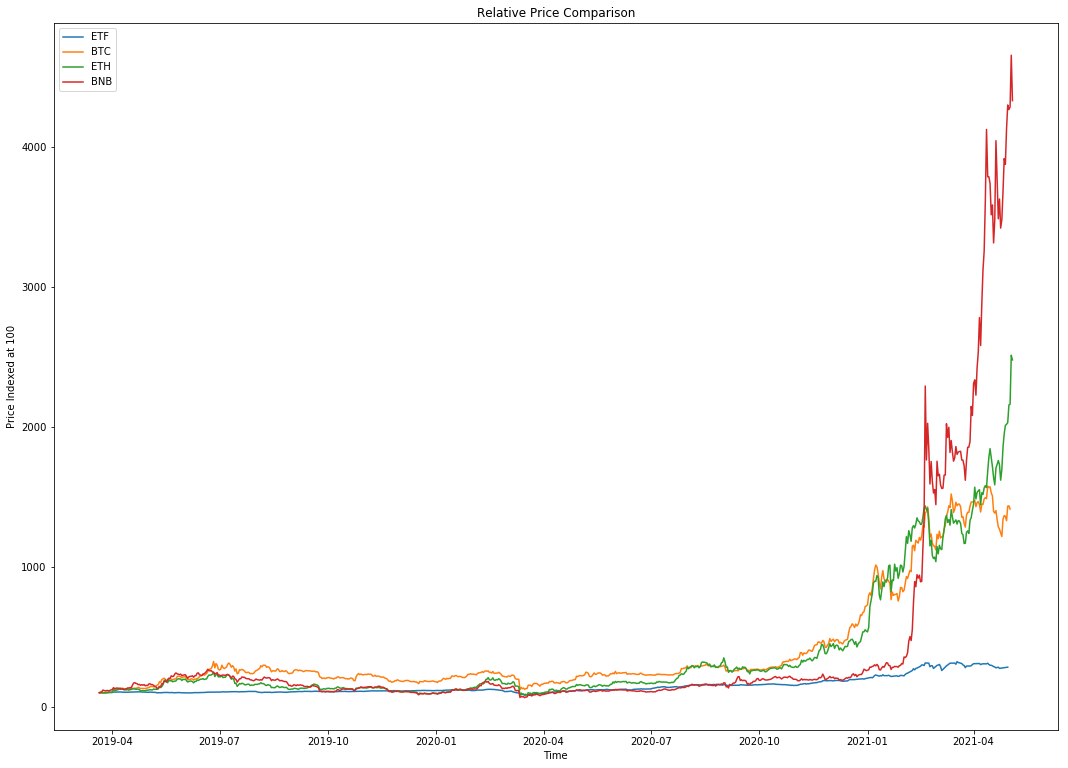

In [13]:
plt.figure(figsize=(18,13))
plt.plot(etf_dates[start_days+1:], etf_price_indexed, label="ETF")
plt.plot(btc_dates[btc_match-1:], btc_price_indexed, 'tab:orange', label="BTC")
plt.plot(eth_dates[eth_match-1:], eth_price_indexed, 'tab:green', label="ETH")
plt.plot(bnb_dates[bnb_match-1:], bnb_price_indexed, 'tab:red', label="BNB")
plt.title("Relative Price Comparison")
plt.xlabel("Time")
plt.ylabel("Price Indexed at 100")
plt.legend()
plt.show()

### Plot Price Change Overlay
Overlay the price changes of the ETF and Cryptocurrencies from the chosen start date.

In [14]:
# Adjust start date as needed
start_days_change = orig_start_days + 450
start_day_change = etf_dates[1+start_days_change]

In [15]:
# Calculate price change
def price_change(prices, index, start_date):
    price_delta = []
    for i in range(start_date, len(prices)):
        index = prices[i] / prices[i-1]
        price_delta.append(index)
    return price_delta

In [16]:
# Calculate ETF Price Change
etf_price_change = price_change(etf_prices, base_index, start_days_change+1)
    
# Calculate BTC Price Change
btc_match = match_dates(start_day_change, btc_dates)
btc_price_change = price_change(btc_prices, base_index, btc_match)
    
# Calculate ETH Price Change
eth_match = match_dates(start_day_change, eth_dates)
eth_price_change = price_change(eth_prices, base_index, eth_match)
    
# Calculate BNB Price Change
bnb_match = match_dates(start_day_change, bnb_dates)
bnb_price_change = price_change(bnb_prices, base_index, bnb_match)

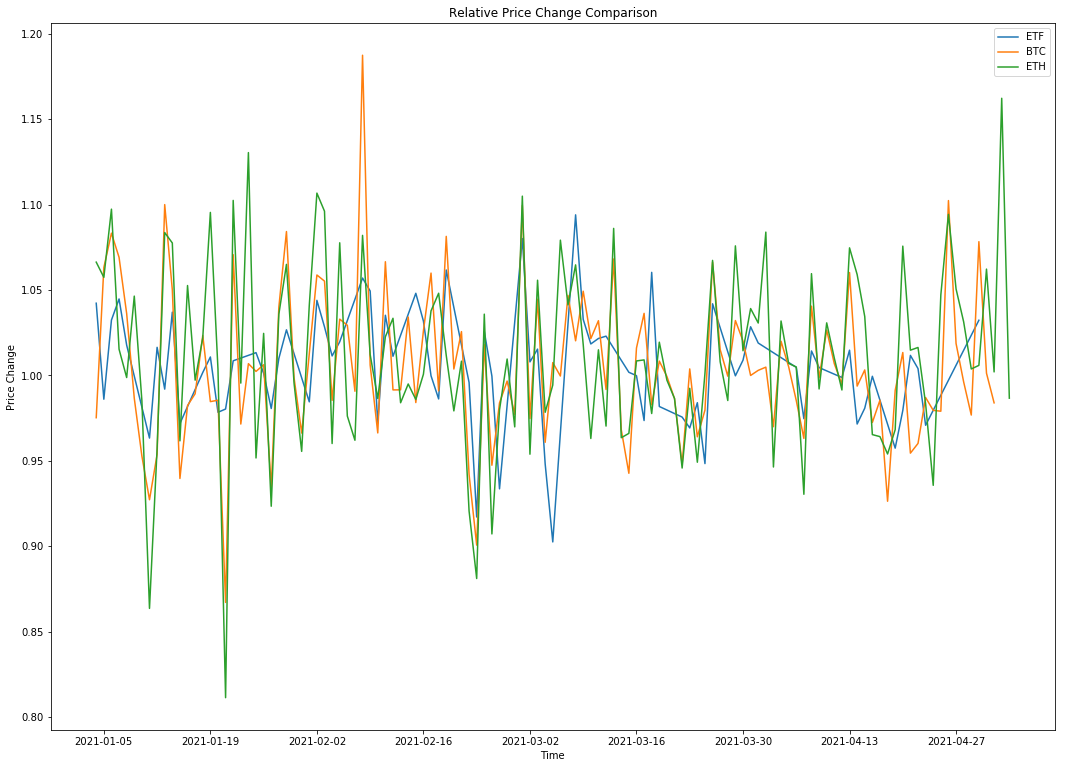

In [19]:
plt.figure(figsize=(18,13))
plt.plot(etf_dates[start_days_change+1:], etf_price_change, label="ETF")
plt.plot(btc_dates[btc_match:], btc_price_change, 'tab:orange', label="BTC")
plt.plot(eth_dates[eth_match:], eth_price_change, 'tab:green', label="ETH")
#plt.plot(bnb_dates[bnb_match:], bnb_price_change, 'tab:red', label="BNB")
plt.title("Relative Price Change Comparison")
plt.xlabel("Time")
plt.ylabel("Price Change")
plt.legend()
plt.show()

### Calculate Correlation Coefficient
Calculate Pearson product-moment correlation coefficients between ETF and Cryptocurrencies.  
Correlation coefficient $R=\frac{C_{ETF, CX}}{\sqrt{C_{ETF}*C_{CX}}}$ for Covariance Matrix C. Note that $C_{CX, ETF}$ is the covariance of the ETF and the Cryptocurrency, $C_{ETF}$ is the variance of the ETF, and $C_{CX}$ is the variance of the Cryptocurrency.  
[John Clark](https://magoosh.com/statistics/pearson-correlation-coefficient/) writes: "Generally, a value of R greater than 0.7 is considered a strong correlation. Anything between 0.5 and 0.7 is a moderate correlation, and anything less than 0.4 is considered a weak or no correlation."

In [20]:
# Maintain only the datapoints for which prices exist for all 
def calculate_corrcoef(crypto_data):
    reduced_etf_prices = []
    reduced_crypto = []
    for date in etf_dates:
        try:
            etf_price = etf_data[date]
            crypto_price = crypto_data[date] 
            reduced_etf_prices.append(etf_price)
            reduced_crypto.append(crypto_price)
        except KeyError:
            pass
    return reduced_etf_prices, reduced_crypto

In [21]:
# Calculate correlation coefficient matrices
btc_corr = np.corrcoef(calculate_corrcoef(btc_data))
eth_corr = np.corrcoef(calculate_corrcoef(eth_data))
bnb_corr = np.corrcoef(calculate_corrcoef(bnb_data))

In [22]:
print(f"Correlation over {len(btc_corr)} trading days:")
print(f"\tETF-BTC:\n\t\t{btc_corr[1][0]}")
print(f"\n\tETF-ETH:\n\t\t{eth_corr[1][0]}")
print(f"\n\tETF-BNB:\n\t\t{bnb_corr[1][0]}")

Correlation over 2 trading days:
	ETF-BTC:
		0.9627400642880929

	ETF-ETH:
		0.9524916544433821

	ETF-BNB:
		0.7776820297005471


## Observations
The overall price plots clearly show the explosive growth of all four assets in recent months.  
Indexing the price overlay at 100 at time of ETF emission is not a very clear indicator, as the ETF has a significantly lower volatility than the Cryptocurrencies. Changing the plot horizon to the past months, however, shows a clear price correlation.  
Furthermore, looking just at a shorter time frame such as January-May 2021, even the price change correlates without significant delay, indicating the existence of some direct causal relationship.  
The eye-balled visual observations of correlation are numerically justified when calculating the Pearson correlation coefficient. Each ETF-Cryptocurrency Pair has a strong to very strong correlation over the whole duration since ETF emission.  
We can thus conclude that it is very likely that the ETF's performance is strongly linked to that of large Cryptocurrency assets.